# Competitor Price Forecast

Competitor price prediction with Python enables businesses to forecast future sales based on factors like business expenses, customer segmentation and price positioning of item. Using ML-techniques, companies can analyze historical data, construct predictive models and make decisions to optimize marketing strategies, allocate resources efficiently and maximize sales. By timely updating the models with new data, commpany can adapt to market dynamics and achieve better performance in a competitive environment.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [3]:
# Load dataset
warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()
df = pd.read_csv("/content/price_competitor.csv")

### Exploratory Data Analysis

In [4]:
# View the first few rows of the dataset

df.head()

,YEAR,SIEMENS_G120_055,SIEMENS_G120_075,SIEMENS_G120_22,VACON_20_055,VACON_20_075,VACON_20_22,Mitsubishi_FR_E_700_075,ABB_ACS150_075,ABB_ACS150_22,Danfoss_VLT_075,Danfoss_VLT_22
0,2004,201,222,245,179,207,236,230,210,245,315,320
1,2005,220,241,267,179,207,236,226,220,267,320,350
2,2006,220,241,267,160,196,213,215,230,285,305,330
3,2007,218,238,256,173,201,225,203,230,285,320,360
4,2008,220,245,267,170,201,234,205,235,340,334,376


In [5]:
# Get the column names of the dataset

df.columns

Index(['YEAR', 'SIEMENS_G120_055', 'SIEMENS_G120_075', 'SIEMENS_G120_22',
       'VACON_20_055', 'VACON_20_075', 'VACON_20_22',
       'Mitsubishi_FR_E_700_075', 'ABB_ACS150_075', 'ABB_ACS150_22',
       'Danfoss_VLT_075', 'Danfoss_VLT_22'],
      dtype='object')

In [6]:
df

,YEAR,SIEMENS_G120_055,SIEMENS_G120_075,SIEMENS_G120_22,VACON_20_055,VACON_20_075,VACON_20_22,Mitsubishi_FR_E_700_075,ABB_ACS150_075,ABB_ACS150_22,Danfoss_VLT_075,Danfoss_VLT_22
0,2004,201,222,245,179,207,236,230,210,245,315,320
1,2005,220,241,267,179,207,236,226,220,267,320,350
2,2006,220,241,267,160,196,213,215,230,285,305,330
3,2007,218,238,256,173,201,225,203,230,285,320,360
4,2008,220,245,267,170,201,234,205,235,340,334,376
5,2009,201,215,245,160,189,203,216,260,340,320,356
6,2010,205,235,264,180,203,215,185,280,356,320,356
7,2011,205,235,264,205,215,234,175,270,342,340,370
8,2012,210,254,285,205,215,234,180,270,342,350,411
9,2013,220,285,305,205,215,234,178,290,350,360,389


In [7]:
# Get the shape of the dataset (rows, columns)

df.shape

(17, 12)

In [8]:
# Check information about the dataset, data types, and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   YEAR                     17 non-null     int64
 1   SIEMENS_G120_055         17 non-null     int64
 2   SIEMENS_G120_075         17 non-null     int64
 3   SIEMENS_G120_22          17 non-null     int64
 4   VACON_20_055             17 non-null     int64
 5   VACON_20_075             17 non-null     int64
 6   VACON_20_22              17 non-null     int64
 7   Mitsubishi_FR_E_700_075  17 non-null     int64
 8   ABB_ACS150_075           17 non-null     int64
 9   ABB_ACS150_22            17 non-null     int64
 10  Danfoss_VLT_075          17 non-null     int64
 11  Danfoss_VLT_22           17 non-null     int64
dtypes: int64(12)
memory usage: 1.7 KB


In [9]:
# Get statistical summary of the numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,17.0,2012.000000,5.049752,2004.0,2008.0,2012.0,2016.0,2020.0
SIEMENS_G120_055,17.0,237.647059,37.712632,201.0,210.0,220.0,260.0,311.0
SIEMENS_G120_075,17.0,277.705882,49.745307,215.0,238.0,254.0,321.0,360.0
SIEMENS_G120_22,17.0,305.000000,54.787088,245.0,264.0,285.0,333.0,401.0
VACON_20_055,17.0,204.235294,33.082339,160.0,179.0,205.0,232.0,270.0
VACON_20_075,17.0,233.294118,41.935612,189.0,203.0,215.0,245.0,327.0
VACON_20_22,17.0,256.647059,48.032465,203.0,234.0,236.0,264.0,370.0
Mitsubishi_FR_E_700_075,17.0,226.411765,50.659474,175.0,186.0,215.0,250.0,340.0
ABB_ACS150_075,17.0,294.000000,61.551807,210.0,235.0,280.0,350.0,401.0
ABB_ACS150_22,17.0,349.000000,54.026614,245.0,340.0,350.0,399.0,433.0


In [10]:
# Check for missing values in the dataset

df.isnull().values.any()
df.isnull().sum()

YEAR                       0
SIEMENS_G120_055           0
SIEMENS_G120_075           0
SIEMENS_G120_22            0
VACON_20_055               0
VACON_20_075               0
VACON_20_22                0
Mitsubishi_FR_E_700_075    0
ABB_ACS150_075             0
ABB_ACS150_22              0
Danfoss_VLT_075            0
Danfoss_VLT_22             0
dtype: int64

### Data Visualization

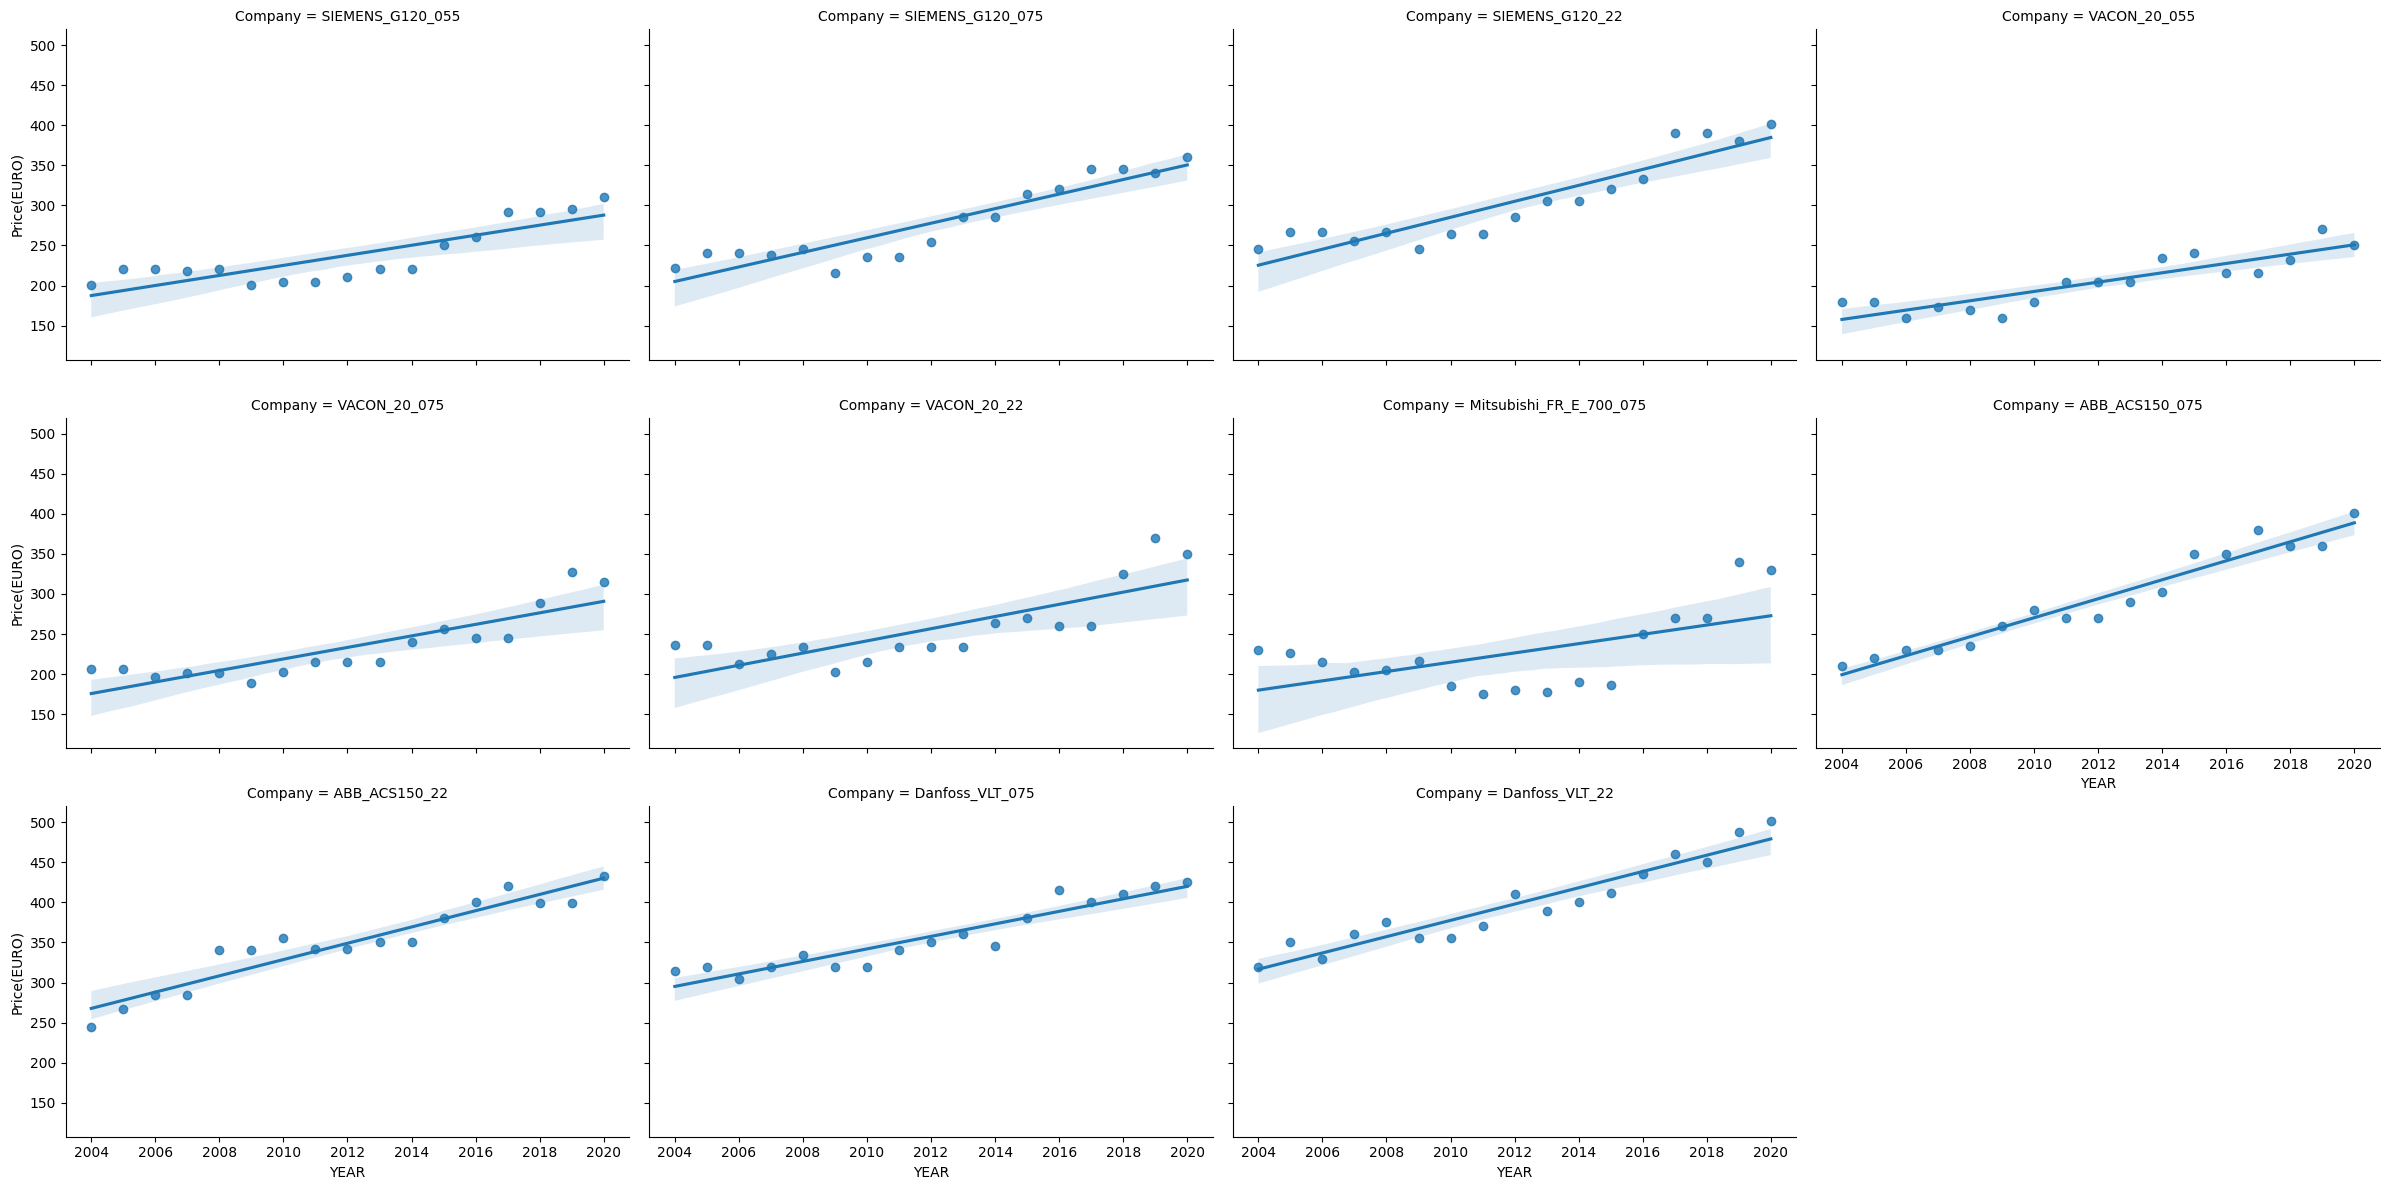

In [25]:
# sns.pairplot(df, x_vars='YEAR', y_vars=['SIEMENS_G120_055','SIEMENS_G120_075','SIEMENS_G120_22','VACON_20_055','VACON_20_075','VACON_20_22','Mitsubishi_FR_E_700_075','ABB_ACS150_075','ABB_ACS150_22','Danfoss_VLT_075','Danfoss_VLT_22'], kind="reg")
# Melt the dataframe to long format for easier plotting with FacetGrid
df_melted = df.melt(id_vars=['YEAR'], var_name='Company', value_name='Price(EURO)')

# Create a FacetGrid
g = sns.FacetGrid(df_melted, col="Company", col_wrap=4, height=4, aspect=1.5)
g.map(sns.regplot, 'YEAR', 'Price(EURO)')

# Adjust layout
plt.tight_layout()
plt.show()

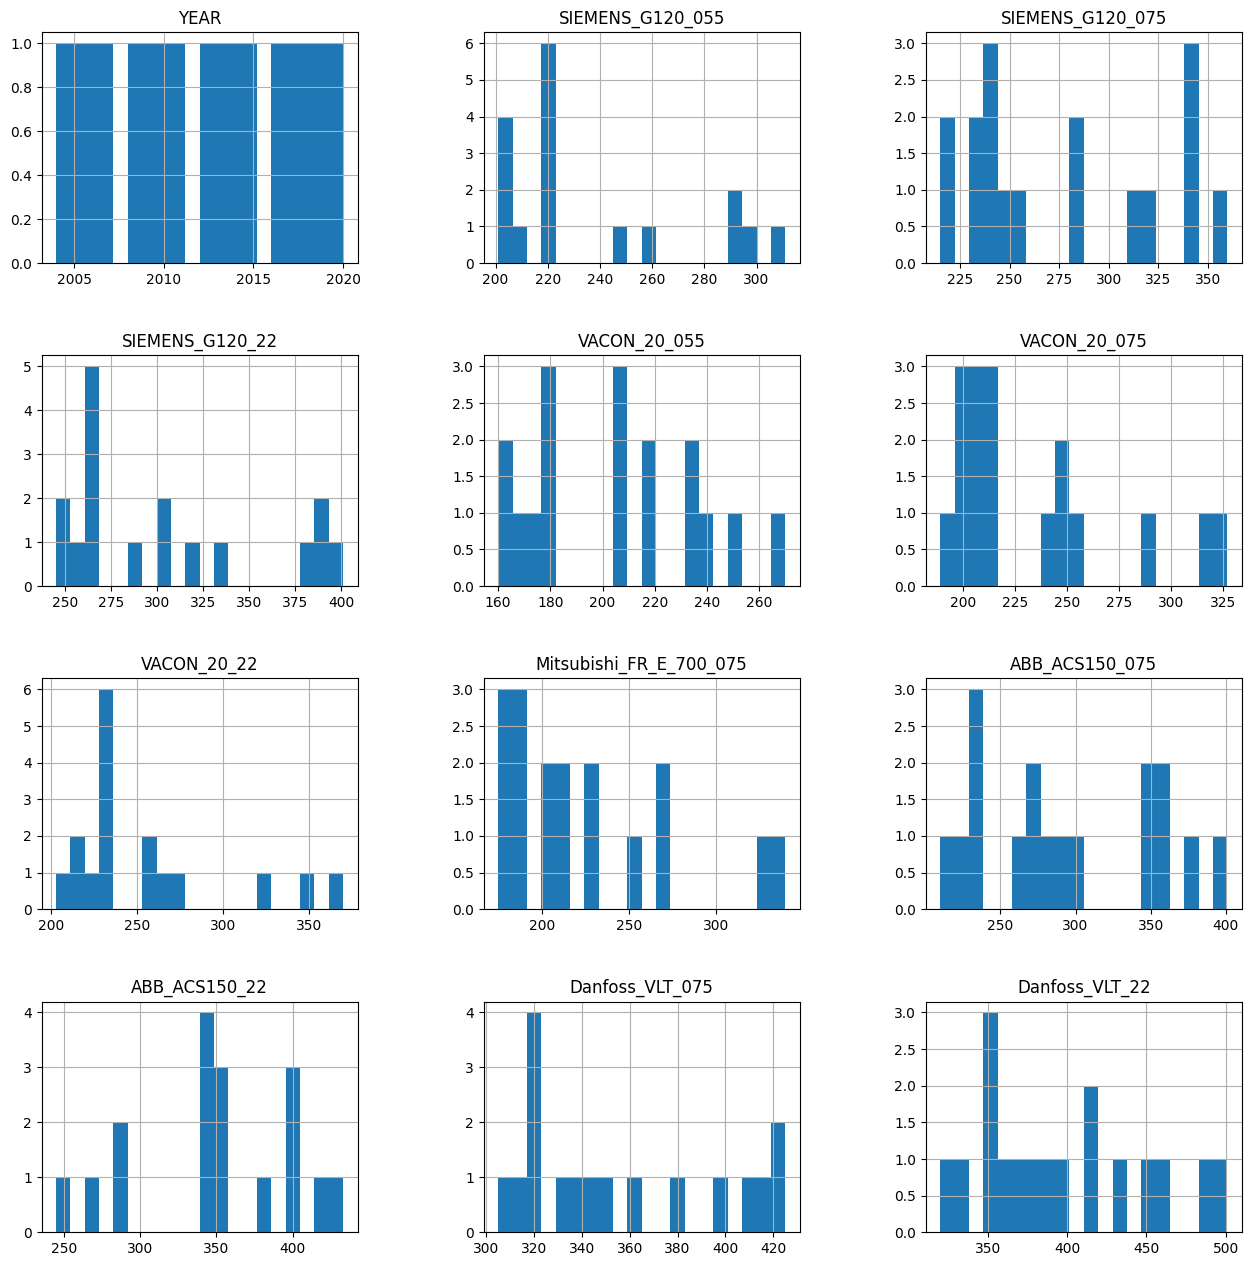

In [21]:
# Histograms to check the normality assumption of the dependent variable (Sales)
# Create histograms with customized spacing
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
df.hist(bins=20,ax=axes)

# Adjust spacing between plots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

plt.show()

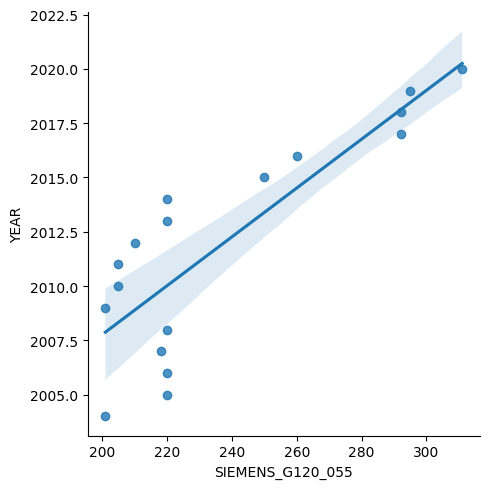

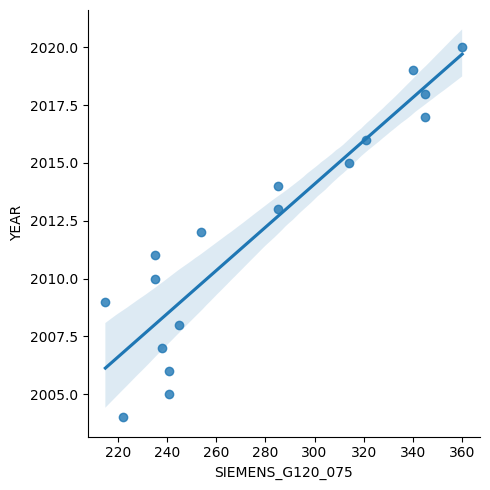

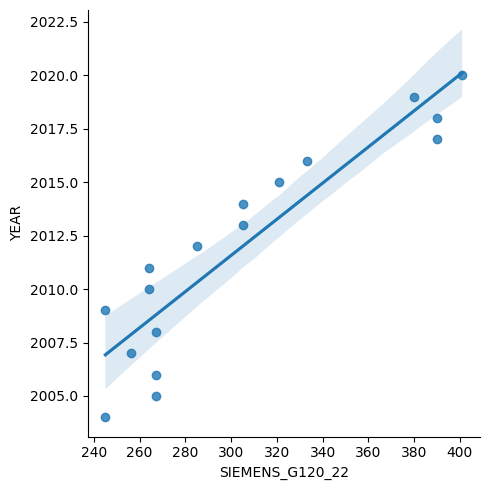

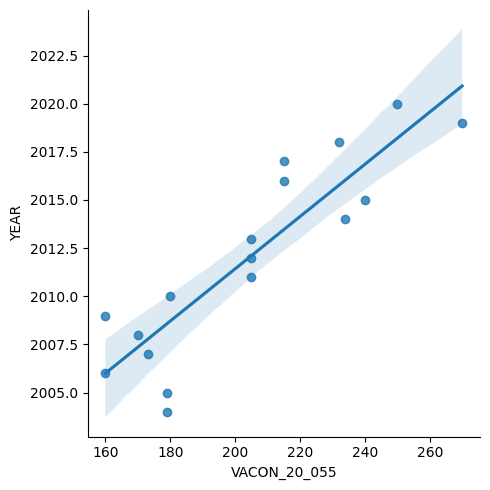

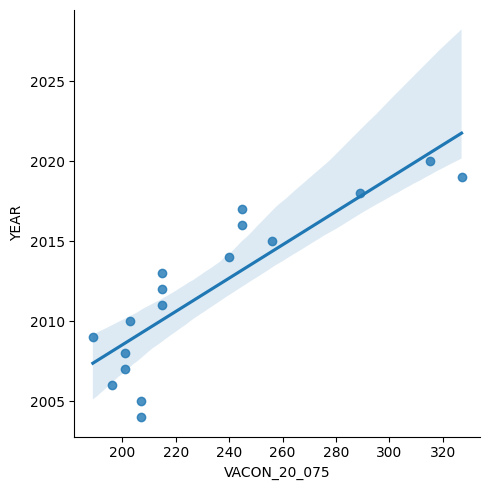

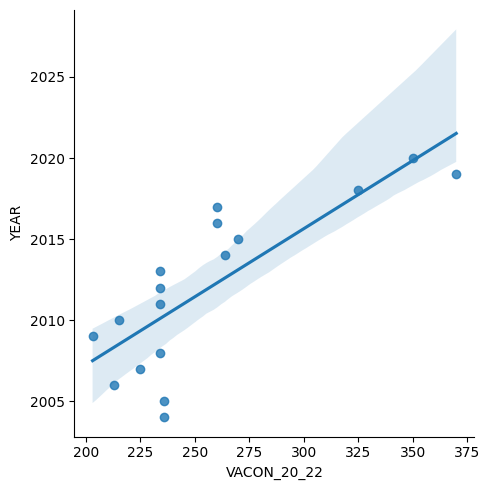

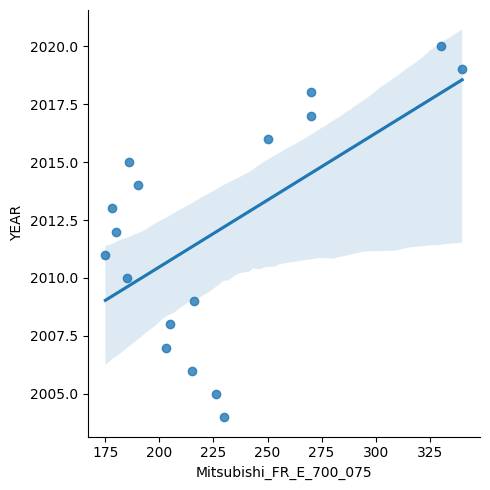

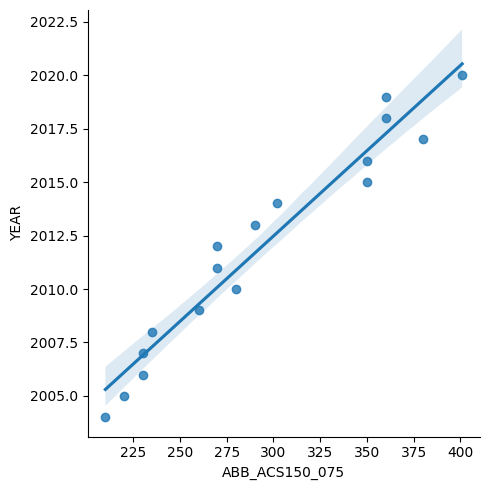

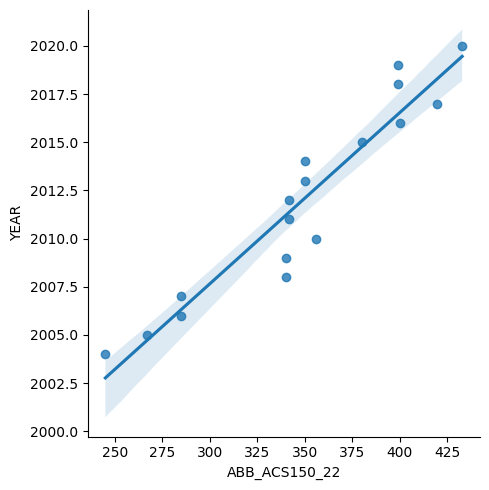

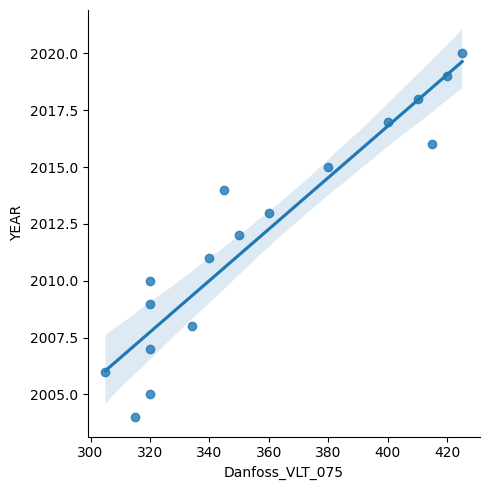

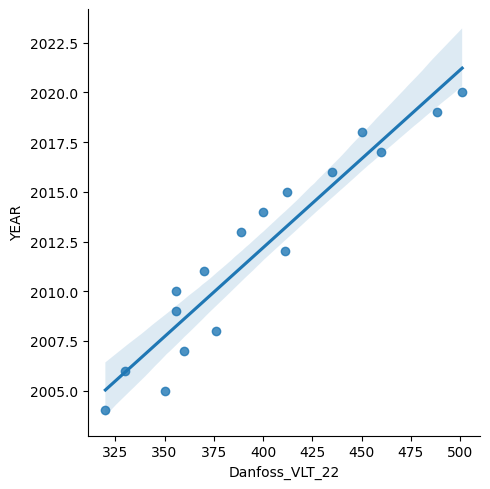

In [26]:
# Linear regression plots to visualize the relationship between each independent variable and the dependent variable

sns.lmplot(x='SIEMENS_G120_055', y='YEAR', data=df)
sns.lmplot(x='SIEMENS_G120_075', y='YEAR', data=df)
sns.lmplot(x='SIEMENS_G120_22',y= 'YEAR', data=df)
sns.lmplot(x='VACON_20_055', y='YEAR', data=df)
sns.lmplot(x='VACON_20_075', y='YEAR', data=df)
sns.lmplot(x='VACON_20_22',y= 'YEAR', data=df)
sns.lmplot(x='Mitsubishi_FR_E_700_075', y='YEAR', data=df)
sns.lmplot(x='ABB_ACS150_075', y='YEAR', data=df)
sns.lmplot(x='ABB_ACS150_22',y= 'YEAR', data=df)
sns.lmplot(x='Danfoss_VLT_075', y='YEAR', data=df)
sns.lmplot(x='Danfoss_VLT_22',y= 'YEAR', data=df)

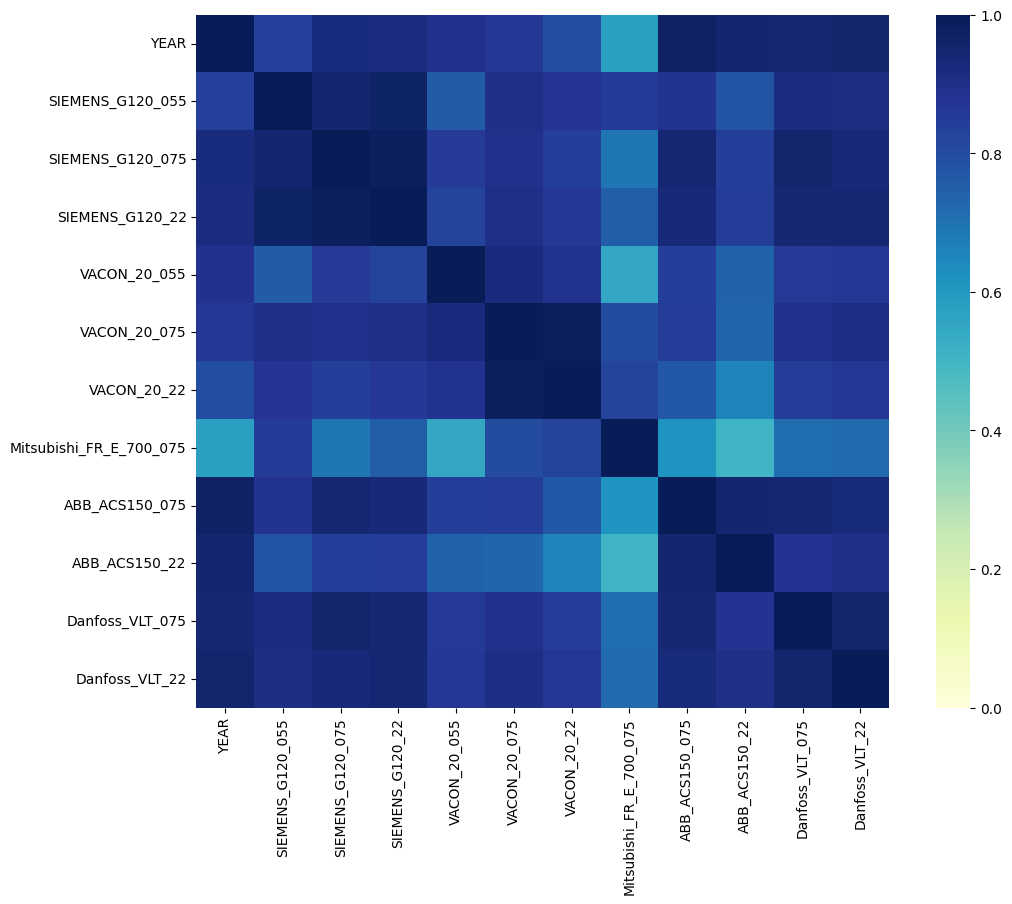

In [27]:
# Correlation Heatmap to check for multicollinearity among independent/dependent variables

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu", ax=ax)
plt.show()

In [29]:
# Model Preparation

# Prepare features and target
X = df[['YEAR']]
future_years = np.arange(2021, 2023).reshape(-1, 1)

# Dictionary to store predictions
predictions = {'YEAR': np.arange(2021, 2023)}


In [33]:
# Train a linear regression model for each column and predict future values of Inverter prices
for column in df.columns[1:]:
    y = df[[column]]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model on training data
    model = LinearRegression().fit(X_train, y_train)

    # Optionally, you can evaluate the model on the test data
    score = model.score(X_test, y_test)
    print(f'R^2 score for {column}: {score:.2f}')
    # Print the model coefficients
    print(f'Coefficients for {column}: {model.coef_}')
    print(f'Intercept for {column}: {model.intercept_}')

    # Predict future values
    predictions[column] = model.predict(future_years).flatten()

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions)

# Combine with the original data
df_combined = pd.concat([df, predictions_df], ignore_index=True)

# Display the predictions
print(df_combined)


R^2 score for SIEMENS_G120_055: 0.66
Coefficients for SIEMENS_G120_055: [[7.03783784]]
Intercept for SIEMENS_G120_055: [-13925.85405405]
R^2 score for SIEMENS_G120_075: 0.71
Coefficients for SIEMENS_G120_075: [[10.10878378]]
Intercept for SIEMENS_G120_075: [-20062.58040541]
R^2 score for SIEMENS_G120_22: 0.72
Coefficients for SIEMENS_G120_22: [[11.15878378]]
Intercept for SIEMENS_G120_22: [-22149.53040541]
R^2 score for VACON_20_055: 0.69
Coefficients for VACON_20_055: [[6.05608108]]
Intercept for VACON_20_055: [-11983.49797297]
R^2 score for VACON_20_075: 0.57
Coefficients for VACON_20_075: [[7.67297297]]
Intercept for VACON_20_075: [-15210.97567568]
R^2 score for VACON_20_22: 0.43
Coefficients for VACON_20_22: [[8.13141892]]
Intercept for VACON_20_22: [-16112.06452703]
R^2 score for Mitsubishi_FR_E_700_075: -0.63
Coefficients for Mitsubishi_FR_E_700_075: [[7.27060811]]
Intercept for Mitsubishi_FR_E_700_075: [-14416.3847973]
R^2 score for ABB_ACS150_075: 0.90
Coefficients for ABB_ACS1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

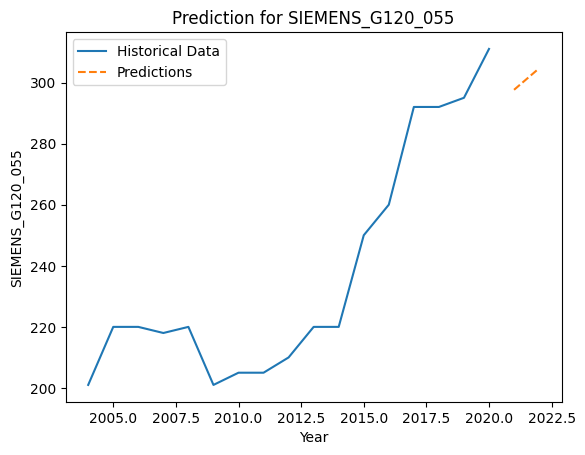

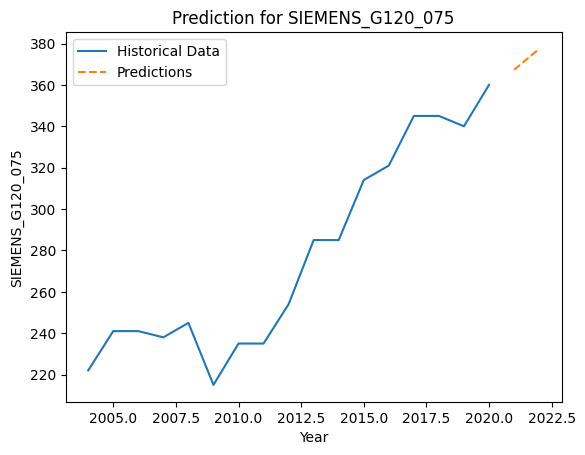

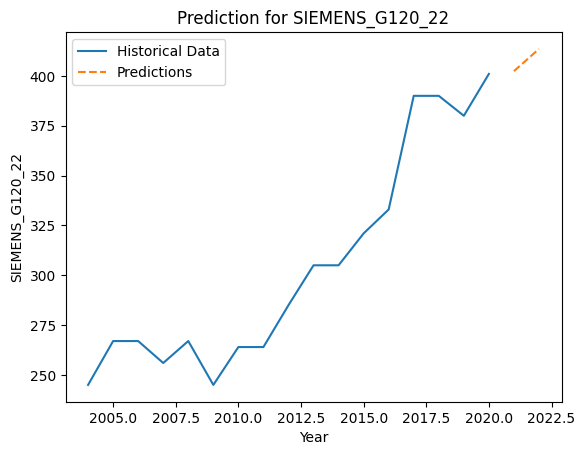

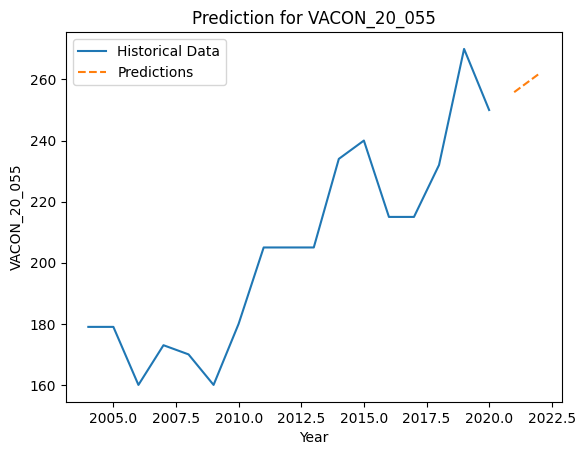

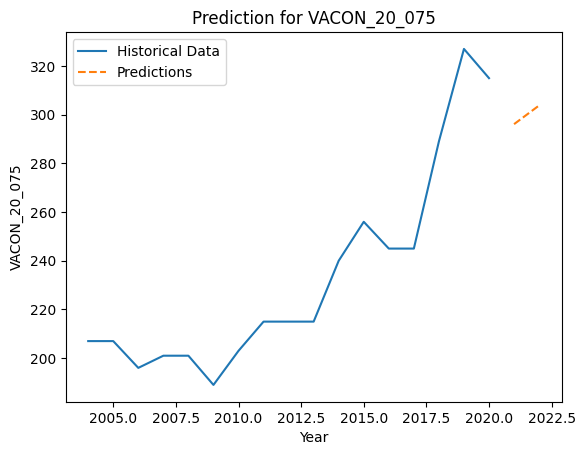

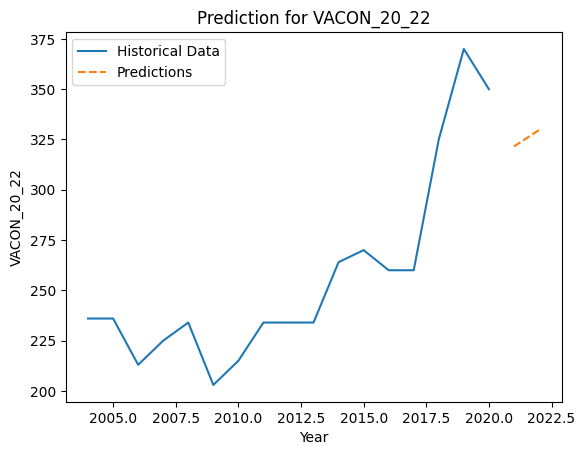

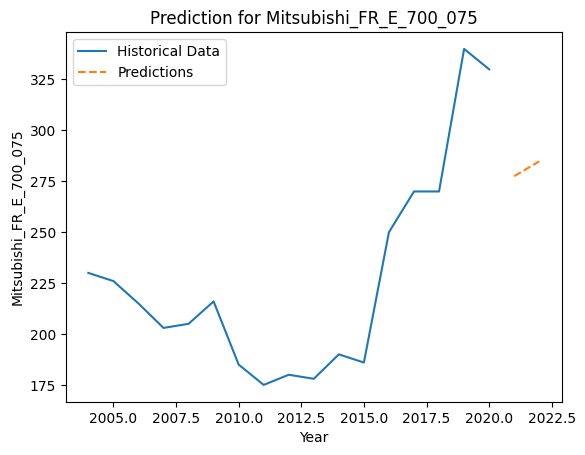

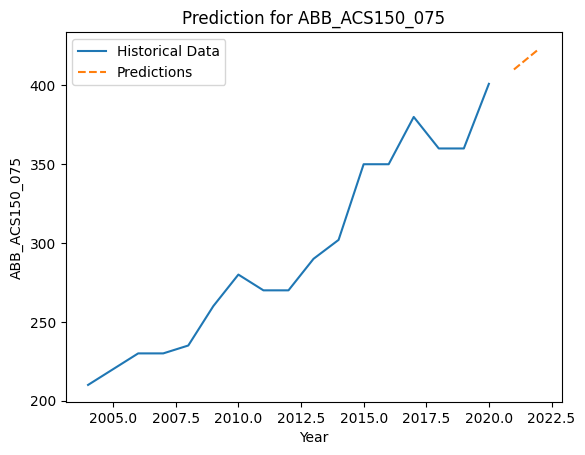

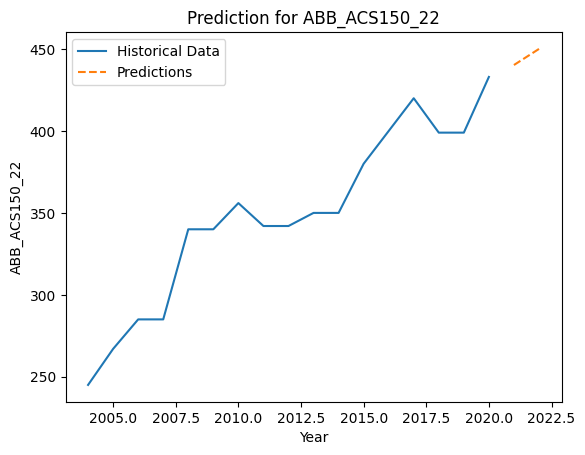

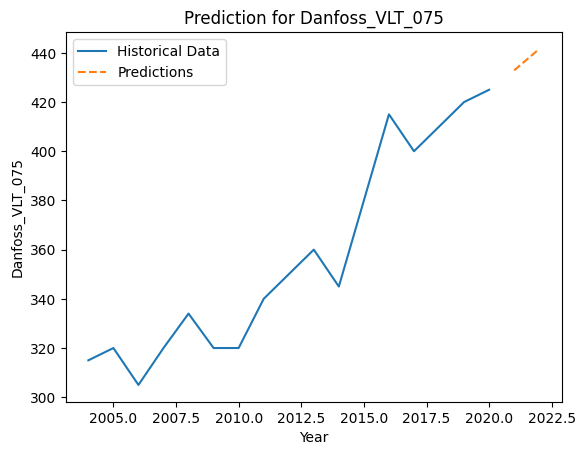

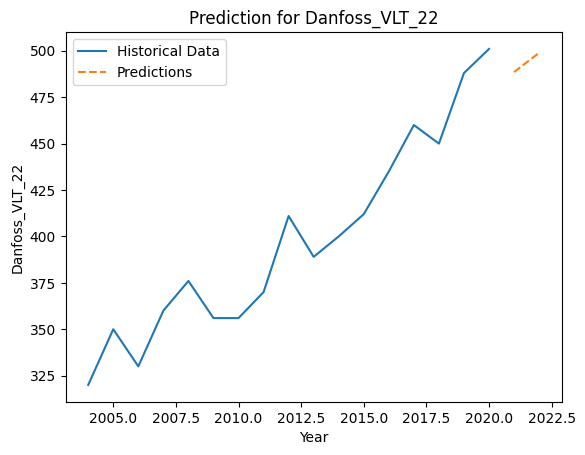

In [32]:
# Plotting the results
for column in df.columns[1:]:
    plt.figure()
    plt.plot(df['YEAR'], df[column], label='Historical Data')
    plt.plot(predictions_df['YEAR'], predictions_df[column], label='Predictions', linestyle='--')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'Prediction for {column}')
    plt.legend()
    plt.show()
